In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()


In [15]:
cursor.execute('CREATE TABLE IF NOT EXISTS sales (product TEXT, quantity INTEGER, price REAL)')


In [16]:
sales_data = [
    ('Apple', 10, 50),
    ('Banana', 20, 30),
    ('Mango', 15, 40),
    ('Orange', 25, 20),
    ('Apple', 5, 50),
    ('Banana', 10, 30)
]

cursor.executemany('INSERT INTO sales VALUES (?, ?, ?)', sales_data)
conn.commit()


In [17]:
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
print(df)


  product  total_qty  revenue
0   Apple         15    750.0
1  Banana         30    900.0
2   Mango         15    600.0
3  Orange         25    500.0


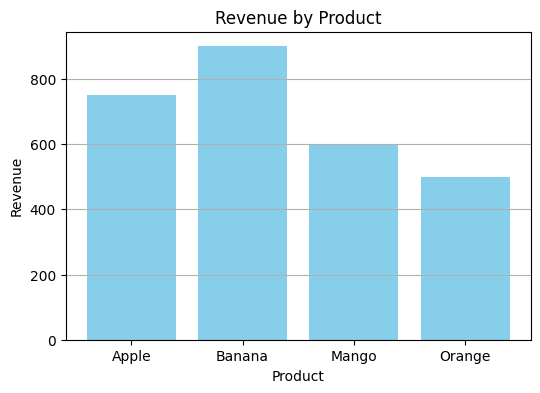

In [18]:
plt.figure(figsize=(6,4))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.savefig('sales_chart.png')
plt.show()


In [19]:
conn.close()
